In [7]:
import json
import copy

In [42]:
with open('mnist_FC5_1.json', 'r') as f:
    mnist1 = json.load(f)
with open('mnist_FC5_2.json', 'r') as f:
    mnist2 = json.load(f)
with open('mnist_FC5_3.json', 'r') as f:
    mnist3 = json.load(f)
with open('mnist_FC5_4.json', 'r') as f:
    mnist4 = json.load(f)
with open('mnist_FC7_1.json', 'r') as f:
    mnist5 = json.load(f)
with open('mnist_FC7_2.json', 'r') as f:
    mnist6 = json.load(f)
with open('mnist_FC7_3.json', 'r') as f:
    mnist7 = json.load(f)
with open('mnist_FC7_4.json', 'r') as f:
    mnist8 = json.load(f)

mnist = {}
mnist['model_MNIST_CNN_Large'] = {}
mnist['model_MNIST_CNN_Small'] = mnist1['model_MNIST_FC5_100_sigmoid']
mnist['model_MNIST_CNN_Small']['1'] = mnist2['model_MNIST_FC5_100_sigmoid']['1']
mnist['model_MNIST_CNN_Small']['2'] = mnist3['model_MNIST_FC5_100_sigmoid']['2']
mnist['model_MNIST_CNN_Small']['3'] = mnist4['model_MNIST_FC5_100_sigmoid']['3']

mnist['model_MNIST_CNN_Large']['0'] = mnist5['model_MNIST_FC7_100_sigmoid']['0']
mnist['model_MNIST_CNN_Large']['1'] = mnist6['model_MNIST_FC7_100_sigmoid']['1']
mnist['model_MNIST_CNN_Large']['2'] = mnist7['model_MNIST_FC7_100_sigmoid']['2']
mnist['model_MNIST_CNN_Large']['3'] = mnist8['model_MNIST_FC7_100_sigmoid']['3']

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [44]:
data_0 = [[mnist['model_MNIST_CNN_Small']['0']['old_range'], mnist['model_MNIST_CNN_Large']['0']['old_range']],
          [mnist['model_MNIST_CNN_Small']['0']['new_range']['it0'], mnist['model_MNIST_CNN_Large']['0']['new_range']['it0']],
          [mnist['model_MNIST_CNN_Small']['0']['new_range']['it1'], mnist['model_MNIST_CNN_Large']['0']['new_range']['it1']]]
data_1 = [[mnist['model_MNIST_CNN_Small']['1']['old_range'], mnist['model_MNIST_CNN_Large']['1']['old_range']],
          [mnist['model_MNIST_CNN_Small']['1']['new_range']['it0'], mnist['model_MNIST_CNN_Large']['1']['new_range']['it0']],
          [mnist['model_MNIST_CNN_Small']['1']['new_range']['it1'], mnist['model_MNIST_CNN_Large']['1']['new_range']['it1']]]
data_2 = [[mnist['model_MNIST_CNN_Small']['2']['old_range'], mnist['model_MNIST_CNN_Large']['2']['old_range']],
          [mnist['model_MNIST_CNN_Small']['2']['new_range']['it0'], mnist['model_MNIST_CNN_Large']['2']['new_range']['it0']],
          [mnist['model_MNIST_CNN_Small']['2']['new_range']['it1'], mnist['model_MNIST_CNN_Large']['2']['new_range']['it1']]]
data_3 = [[mnist['model_MNIST_CNN_Small']['3']['old_range'], mnist['model_MNIST_CNN_Large']['3']['old_range']],
          [mnist['model_MNIST_CNN_Small']['3']['new_range']['it0'], mnist['model_MNIST_CNN_Large']['3']['new_range']['it0']],
          [mnist['model_MNIST_CNN_Small']['3']['new_range']['it1'], mnist['model_MNIST_CNN_Large']['3']['new_range']['it1']]]

In [58]:
data_3

[[[7.593246393052325, 11.457115599287638],
  [9.948538494792755, 11.135768896096495]],
 [[8.762382022047715, 11.315749511374051],
  [10.289468548345432, 11.037160669327385]],
 [[8.899586572957128, 11.30775823310849],
  [10.289468548345432, 11.037160669327385]]]

In [46]:
runtime = {}
runtime['FNN1'] = []
for idxImage in range(4):
    times = []
    data = mnist['model_MNIST_CNN_Small'][str(idxImage)]['new_range']['time']
    for key in data:
        times.append(data[key])
    runtime['FNN1'].append(times)
runtime['FNN2'] = []
for idxImage in range(4):
    times = []
    data = mnist['model_MNIST_CNN_Large'][str(idxImage)]['new_range']['time']
    for key in data:
        times.append(data[key])
    runtime['FNN2'].append(times)
runtime

{'FNN1': [[380.0016791820526, 688.1241900920868],
  [350.0871694087982, 575.1005983352661],
  [383.11907744407654, 593.7969832420349],
  [411.62716841697693, 645.9398033618927]],
 'FNN2': [[452.3591618537903, 748.3819236755371],
  [577.0009226799011, 1079.1052072048187],
  [488.87425899505615, 785.3063097000122],
  [585.2789373397827, 2078.120485305786]]}

In [47]:
total_time = {}
for key in runtime:
    total_time[key] = np.sum(runtime[key], axis=1)
total_time

{'FNN1': array([1068.12586927,  925.18776774,  976.91606069, 1057.56697178]),
 'FNN2': array([1200.74108553, 1656.10612988, 1274.1805687 , 2663.39942265])}

In [48]:
total_runtime = {}
total_runtime['FNN1'] = []
for idxImage in range(4):
    times = mnist['model_MNIST_CNN_Small'][str(idxImage)]['runtime']
    total_runtime['FNN1'].append(times)
total_runtime['FNN2'] = []
for idxImage in range(4):
    times = mnist['model_MNIST_CNN_Large'][str(idxImage)]['runtime']
    total_runtime['FNN2'].append(times)
total_runtime

{'FNN1': [1135.8460144996643,
  941.5164682865143,
  1020.024777173996,
  1081.118870973587],
 'FNN2': [1423.7594454288483,
  1686.541298866272,
  1408.863136291504,
  2681.7198960781097]}

In [49]:
eran_time = {}
for key in total_runtime:
    eran_time[key] = np.array(total_runtime[key]) - total_time[key]
eran_time

{'FNN1': array([67.72014523, 16.32870054, 43.10871649, 23.55189919]),
 'FNN2': array([223.0183599 ,  30.43516898, 134.6825676 ,  18.32047343])}

In [50]:
labels = ['FNN1', 'FNN2']
data00 = np.diff(data_0).reshape(3, 2)[0]
data01 = np.diff(data_0).reshape(3, 2)[1]
data02 = np.diff(data_0).reshape(3, 2)[2]

data10 = np.diff(data_1).reshape(3, 2)[0]
data11 = np.diff(data_1).reshape(3, 2)[1]
data12 = np.diff(data_1).reshape(3, 2)[2]

data20 = np.diff(data_2).reshape(3, 2)[0]
data21 = np.diff(data_2).reshape(3, 2)[1]
data22 = np.diff(data_2).reshape(3, 2)[2]

data30 = np.diff(data_3).reshape(3, 2)[0]
data31 = np.diff(data_3).reshape(3, 2)[1]
data32 = np.diff(data_3).reshape(3, 2)[2]

In [72]:
(1 - data32/data30) * 100

array([37.6746072 , 37.02215508])

x = np.arange(len(labels))
width = 0.8

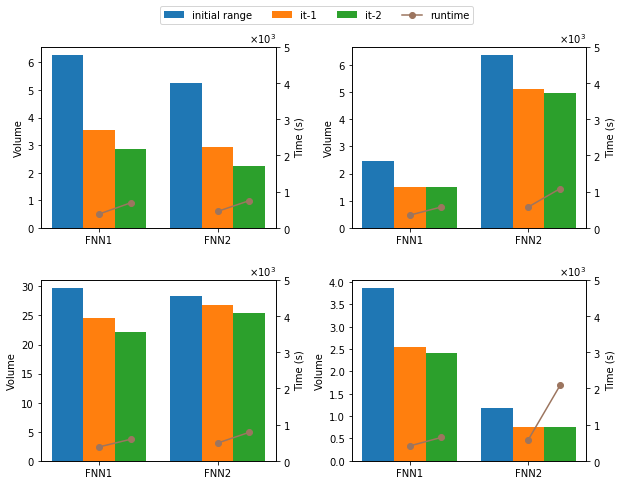

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(9,6+3/4))
axs_twin = []
for idx1 in range(2):
    for idx2 in range(2):
        axs[idx1, idx2].set_ylabel('Volume')
        axs_twin.append(axs[idx1, idx2].twinx())
        axs_twin[-1].set_ylabel('Time (s)')
        axs_twin[-1].set_ylim((0, 5000))
        axs_twin[-1].ticklabel_format(style='sci', scilimits=(0,3), axis='y', useMathText=True)

rects00 = axs[0, 0].bar(x - width/3, data00, width/3, label='initial range')
rects01 = axs[0, 0].bar(x, data01, width/3, label='it-1')
rects02 = axs[0, 0].bar(x + width/3, data02, width/3, label='it-2')

rects10 = axs[0, 1].bar(x - width/3, data10, width/3, label='initial range')
rects11 = axs[0, 1].bar(x, data11, width/3, label='it-1')
rects12 = axs[0, 1].bar(x + width/3, data12, width/3, label='it-2')

rects20 = axs[1, 0].bar(x - width/3, data20, width/3, label='initial range')
rects21 = axs[1, 0].bar(x, data21, width/3, label='it-1')
rects22 = axs[1, 0].bar(x + width/3, data22, width/3, label='it-2')

rects30 = axs[1, 1].bar(x - width/3, data30, width/3, label='initial range')
rects31 = axs[1, 1].bar(x, data31, width/3, label='it-1')
rects32 = axs[1, 1].bar(x + width/3, data32, width/3, label='it-2')


point_x = {}
for idxImage in range(4):
    point_x[str(idxImage)] = {}

for idxCNN in range(len(labels)):
    point_x['0'][labels[idxCNN]] = [rects01[idxCNN].get_x() + rects01[idxCNN].get_width()/2.0,
                                    rects02[idxCNN].get_x() + rects02[idxCNN].get_width()/2.0,]
    

for idxCNN in range(len(labels)):
    point_x['1'][labels[idxCNN]] = [rects11[idxCNN].get_x() + rects11[idxCNN].get_width()/2.0,
                                    rects12[idxCNN].get_x() + rects11[idxCNN].get_width()/2.0,]
    

for idxCNN in range(len(labels)):
    point_x['2'][labels[idxCNN]] = [rects21[idxCNN].get_x() + rects01[idxCNN].get_width()/2.0,
                                    rects22[idxCNN].get_x() + rects01[idxCNN].get_width()/2.0]
    

for idxCNN in range(len(labels)):
    point_x['3'][labels[idxCNN]] = [rects31[idxCNN].get_x() + rects01[idxCNN].get_width()/2.0,
                                    rects32[idxCNN].get_x() + rects01[idxCNN].get_width()/2.0]
    
for idxImage in range(4):
    for label in labels:
        axs_twin[idxImage].plot(point_x[str(idxImage)][label], runtime[label][idxImage], marker='o', color='#9c755f', label='runtime')
        
# Add some text for labels, title and custom x-axis tick labels, etc.
for i in range(2):
    for j in range(2):
        axs[i, j].set_xticks(x)
        axs[i, j].set_xticklabels(labels)
        if i == 0 and j == 1:
            h1, l1 = axs[i, j].get_legend_handles_labels()
            h2, l2 = axs_twin[1].get_legend_handles_labels()
            axs[i, j].legend(h1 + h2, l1+l2, loc='upper center', bbox_to_anchor=(-0.15, 1.25), ncol=4)
plt.tight_layout(pad=2.0)
fig.savefig("mnist_FC.pdf", bbox_inches='tight')